<a href="https://colab.research.google.com/github/Ishita95-harvad/SAS-KIIT/blob/main/SAS_KIIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAS-KIIT**
South Asian Sounds - KIIT : A Dataset for Audio Classification Research



---



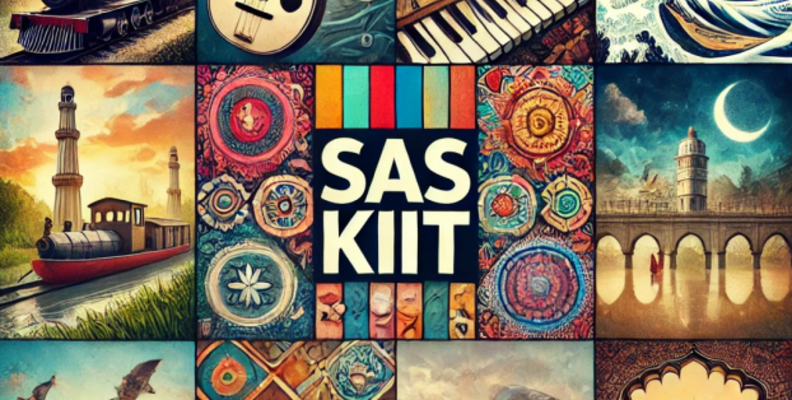

## Data loading

### Subtask:
Load the "metadata.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "metadata.csv" file into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df_metadata = pd.read_csv('metadata.csv')
    display(df_metadata.head())
    print(df_metadata.shape)
except FileNotFoundError:
    print("Error: 'metadata.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.EmptyDataError:
    print("Error: 'metadata.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'metadata.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,slice_file_name,slicing_start_time,slicing_end_time,classID,class_name,folder
0,0_Tanpura_1.wav,0.0,4.0,0,Tanpura,7
1,0_Tanpura_2.wav,4.0,8.0,0,Tanpura,7
2,0_Tanpura_3.wav,8.0,12.0,0,Tanpura,6
3,0_Tanpura_4.wav,12.0,16.0,0,Tanpura,5
4,0_Tanpura_5.wav,16.0,20.0,0,Tanpura,10


(9450, 6)


## Data exploration

### Subtask:
Explore the loaded metadata.


**Reasoning**:
Examine data types, missing values, descriptive statistics, and distributions of categorical and numerical columns, and then visualize the distributions and potential outliers.



slice_file_name        object
slicing_start_time    float64
slicing_end_time      float64
classID                 int64
class_name             object
folder                  int64
dtype: object
slice_file_name       0
slicing_start_time    0
slicing_end_time      0
classID               0
class_name            0
folder                0
dtype: int64
slice_file_name       0.0
slicing_start_time    0.0
slicing_end_time      0.0
classID               0.0
class_name            0.0
folder                0.0
dtype: float64
       slicing_start_time  slicing_end_time      classID       folder
count         9450.000000       9450.000000  9450.000000  9450.000000
mean           898.000000        902.000000    10.000000     5.530582
std            519.641454        519.641454     6.055621     2.874407
min              0.000000          4.000000     0.000000     1.000000
25%            448.000000        452.000000     5.000000     3.000000
50%            898.000000        902.000000    10.000000  

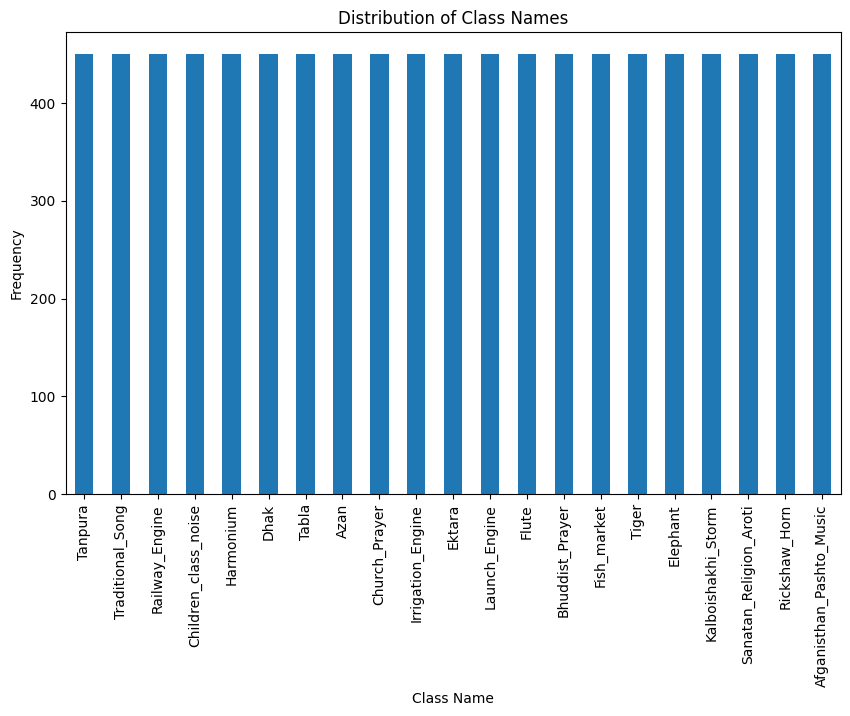

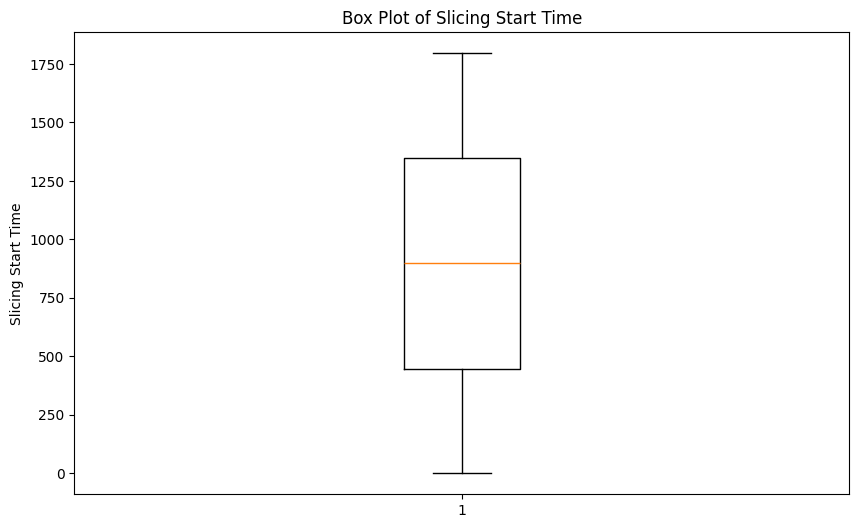

                    slicing_start_time  slicing_end_time
slicing_start_time                 1.0               1.0
slicing_end_time                   1.0               1.0


In [ ]:
# Examine data types
print(df_metadata.dtypes)

# Check for missing values
print(df_metadata.isnull().sum())
print(df_metadata.isnull().sum() / len(df_metadata) * 100)

# Descriptive statistics for numerical columns
print(df_metadata.describe())

# Analyze categorical columns
for col in ['classID', 'class_name', 'folder']:
    print(f"\nColumn: {col}")
    print(df_metadata[col].value_counts())

import matplotlib.pyplot as plt
# Visualize categorical column distributions (example with 'class_name')
plt.figure(figsize=(10, 6))
df_metadata['class_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Class Names')
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.show()

# Investigate potential outliers (example with 'slicing_start_time')
plt.figure(figsize=(10, 6))
plt.boxplot(df_metadata['slicing_start_time'])
plt.title('Box Plot of Slicing Start Time')
plt.ylabel('Slicing Start Time')
plt.show()

# Calculate correlation between numerical features
print(df_metadata[['slicing_start_time', 'slicing_end_time']].corr())

## Data cleaning

### Subtask:
Clean the data in `df_metadata`.


**Reasoning**:
Clean the data according to the instructions provided.  This includes type conversion, handling inconsistencies in time columns, ensuring `classID` is integer, verifying consistency in `class_name` and `folder`, and displaying the cleaned dataframe.



In [ ]:
import pandas as pd

# Convert 'slicing_start_time' and 'slicing_end_time' to numeric, coercing errors to NaN
df_metadata['slicing_start_time'] = pd.to_numeric(df_metadata['slicing_start_time'], errors='coerce')
df_metadata['slicing_end_time'] = pd.to_numeric(df_metadata['slicing_end_time'], errors='coerce')

# Drop rows with NaN values in time columns
df_metadata.dropna(subset=['slicing_start_time', 'slicing_end_time'], inplace=True)

# Convert 'classID' to integer, coercing errors to NaN and dropping NaN values
df_metadata['classID'] = pd.to_numeric(df_metadata['classID'], errors='coerce').astype('Int64')
df_metadata.dropna(subset=['classID'], inplace=True)


# Remove rows with missing or empty values in 'class_name' or 'folder'
df_metadata.dropna(subset=['class_name', 'folder'], inplace=True)
df_metadata = df_metadata[df_metadata['class_name'].astype(str).str.strip() != '']
df_metadata = df_metadata[df_metadata['folder'].astype(str).str.strip() != '']


# Display the first few rows of the cleaned DataFrame
display(df_metadata.head())

# Print the shape of the cleaned DataFrame
print(f"Shape of cleaned DataFrame: {df_metadata.shape}")

# Print the number of missing values in each column
print(f"\nMissing values in each column:\n{df_metadata.isnull().sum()}")

,slice_file_name,slicing_start_time,slicing_end_time,classID,class_name,folder
0,0_Tanpura_1.wav,0.0,4.0,0,Tanpura,7
1,0_Tanpura_2.wav,4.0,8.0,0,Tanpura,7
2,0_Tanpura_3.wav,8.0,12.0,0,Tanpura,6
3,0_Tanpura_4.wav,12.0,16.0,0,Tanpura,5
4,0_Tanpura_5.wav,16.0,20.0,0,Tanpura,10


Shape of cleaned DataFrame: (9450, 6)

Missing values in each column:
slice_file_name       0
slicing_start_time    0
slicing_end_time      0
classID               0
class_name            0
folder                0
dtype: int64


## Data analysis

### Subtask:
Analyze the cleaned metadata.


**Reasoning**:
Calculate descriptive statistics for numerical features, explore relationships between them using correlation analysis and visualization, and investigate the distributions of categorical features.



       slicing_start_time  slicing_end_time
count         9450.000000       9450.000000
mean           898.000000        902.000000
std            519.641454        519.641454
min              0.000000          4.000000
25%            448.000000        452.000000
50%            898.000000        902.000000
75%           1348.000000       1352.000000
max           1796.000000       1800.000000


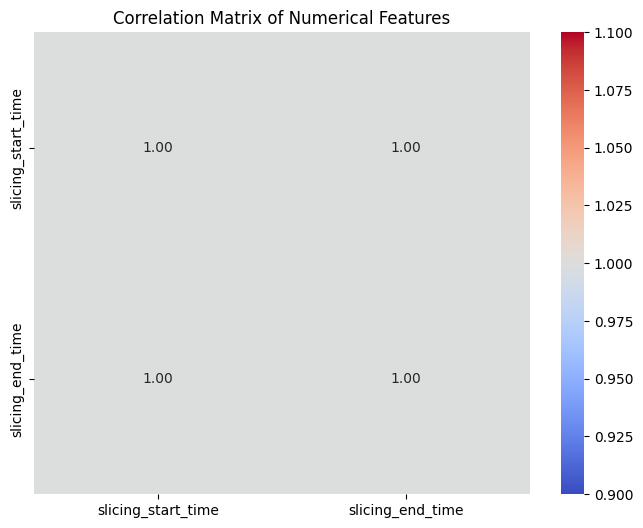


Distribution of classID:
classID
0     450
1     450
2     450
3     450
4     450
5     450
6     450
7     450
8     450
9     450
10    450
11    450
12    450
13    450
14    450
15    450
16    450
17    450
18    450
19    450
20    450
Name: count, dtype: Int64


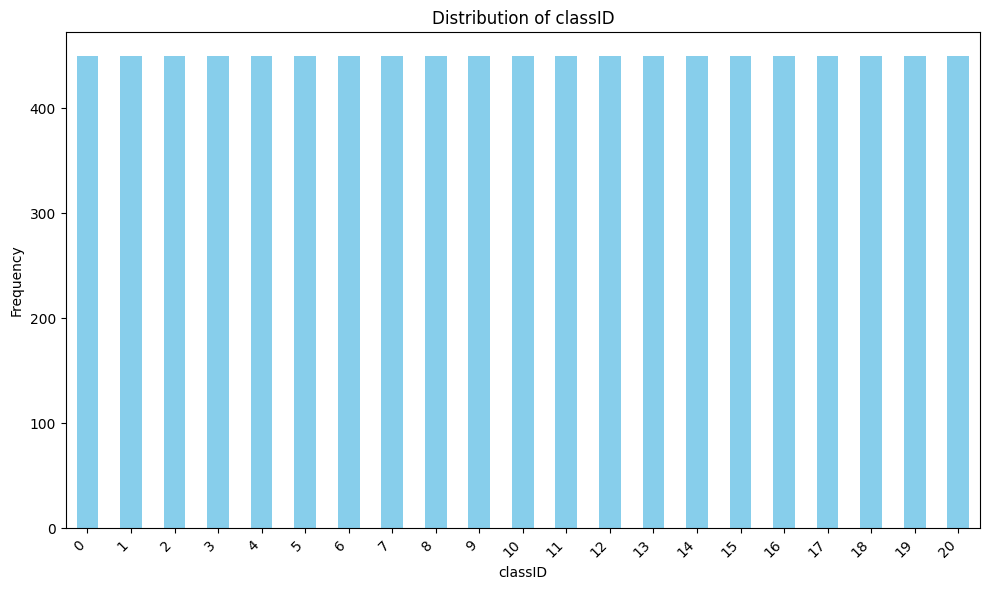


Distribution of class_name:
class_name
Tanpura                     450
Traditional_Song            450
Railway_Engine              450
Children_class_noise        450
Harmonium                   450
Dhak                        450
Tabla                       450
Azan                        450
Church_Prayer               450
Irrigation_Engine           450
Ektara                      450
Launch_Engine               450
Flute                       450
Bhuddist_Prayer             450
Fish_market                 450
Tiger                       450
Elephant                    450
Kalboishakhi_Storm          450
Sanatan_Religion_Aroti      450
Rickshaw_Horn               450
Afganisthan_Pashto_Music    450
Name: count, dtype: int64


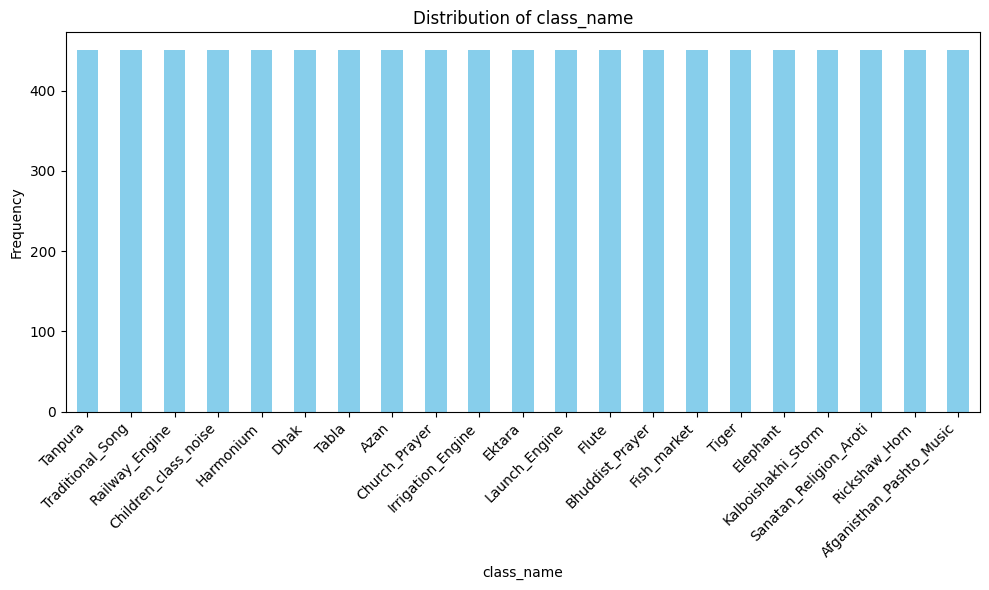


Distribution of folder:
folder
7     1036
9      968
2      950
4      946
1      943
10     943
8      937
5      918
6      910
3      899
Name: count, dtype: int64


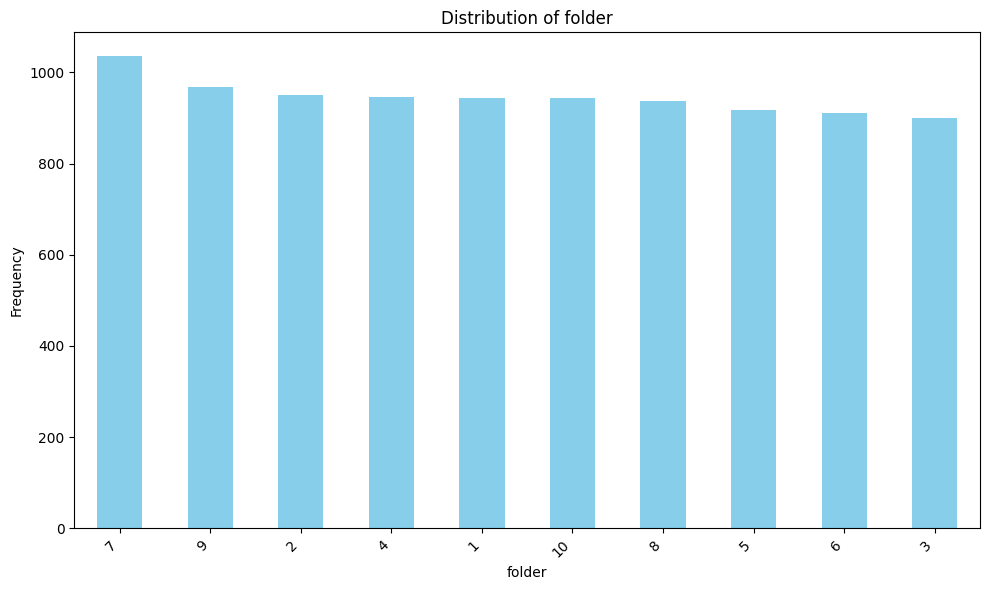

<ipython-input-4-a2bd2182545a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classID', y='slicing_start_time', data=df_metadata, palette="Set3")


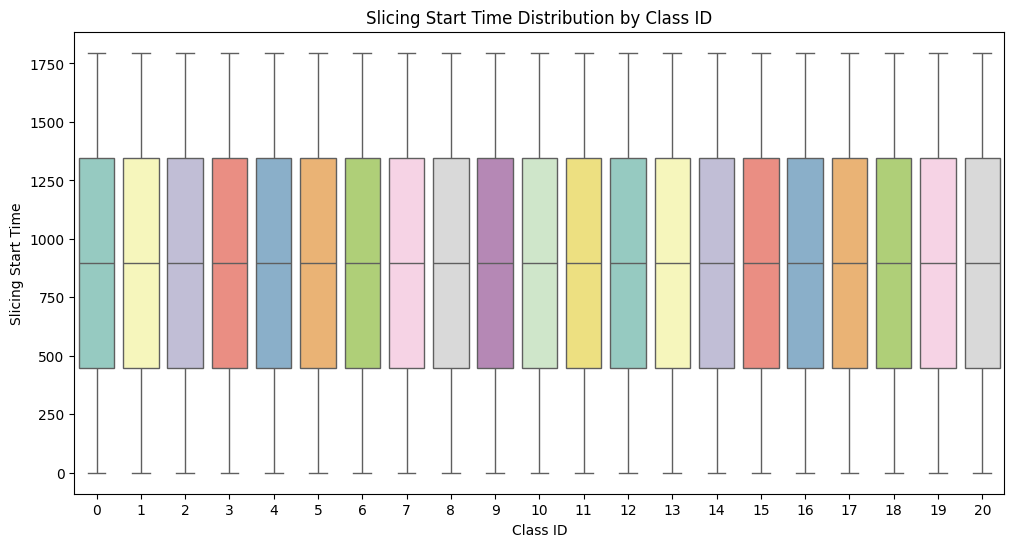

<ipython-input-4-a2bd2182545a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classID', y='slicing_end_time', data=df_metadata, palette="Set3")


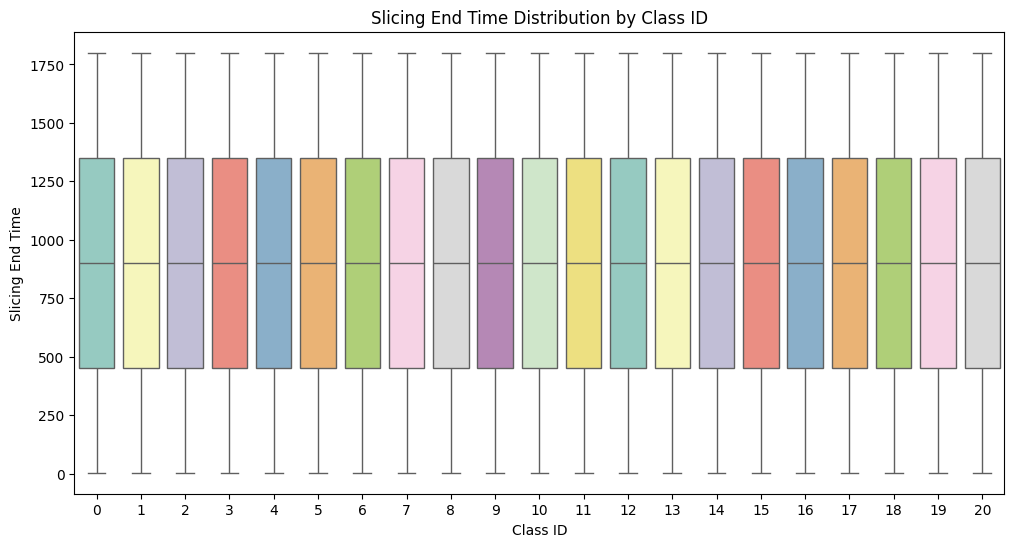

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical features
numerical_features = ['slicing_start_time', 'slicing_end_time']
print(df_metadata[numerical_features].describe())

# Correlation analysis and heatmap
correlation_matrix = df_metadata[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Distribution of categorical features
categorical_features = ['classID', 'class_name', 'folder']
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df_metadata[feature].value_counts())
    plt.figure(figsize=(10, 6))
    df_metadata[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

# Relationship between categorical and numerical features (example with 'classID')
plt.figure(figsize=(12, 6))
sns.boxplot(x='classID', y='slicing_start_time', data=df_metadata, palette="Set3")
plt.title('Slicing Start Time Distribution by Class ID')
plt.xlabel('Class ID')
plt.ylabel('Slicing Start Time')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='classID', y='slicing_end_time', data=df_metadata, palette="Set3")
plt.title('Slicing End Time Distribution by Class ID')
plt.xlabel('Class ID')
plt.ylabel('Slicing End Time')
plt.show()

## Data visualization

### Subtask:
Create visualizations to complement the data analysis.


**Reasoning**:
Create visualizations to complement the data analysis, improving existing ones and generating new ones.  Save all visualizations as image files.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Create the visualizations directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Convert 'classID' to int64
df_metadata['classID'] = df_metadata['classID'].astype('int64')

# 1. Enhance Existing Visualizations
# Improved Class Distribution
plt.figure(figsize=(12, 6))
df_metadata['class_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Class Names')
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('visualizations/class_distribution.png')
plt.close() # Close the figure to free up memory


# Improved Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='classID', y='slicing_start_time', data=df_metadata, hue='classID', palette="Set3", legend=False)
plt.title('Slicing Start Time Distribution by Class ID')
plt.xlabel('Class ID')
plt.ylabel('Slicing Start Time')
plt.savefig('visualizations/slicing_start_time_by_classID.png')
plt.close()


# 2. Additional Visualizations
# Pairplot of Numerical Features
try:
    plt.figure(figsize=(10, 8))
    sns.pairplot(df_metadata[['slicing_start_time', 'slicing_end_time', 'classID']], hue='classID', palette='viridis')
    plt.savefig('visualizations/pairplot_numerical_features.png')
    plt.close()
except Exception as e:
    print(f"Error creating pairplot: {e}")


# Histogram of Numerical Features
plt.figure(figsize=(12, 6))
plt.hist(df_metadata['slicing_start_time'], bins=30, color='skyblue', alpha=0.7, label='Slicing Start Time')
plt.hist(df_metadata['slicing_end_time'], bins=30, color='salmon', alpha=0.7, label='Slicing End Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Slicing Start and End Times')
plt.legend()
plt.savefig('visualizations/histograms_slicing_times.png')
plt.close()


# Relationship between 'folder' and 'class_name'
plt.figure(figsize=(14, 7))
folder_class_counts = df_metadata.groupby(['folder', 'class_name']).size().unstack()
folder_class_counts.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Class Distribution Across Folders')
plt.xlabel('Folder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('visualizations/class_distribution_by_folder.png') # More descriptive filename
plt.close()

<Figure size 1000x800 with 0 Axes>

<Figure size 1400x700 with 0 Axes>